# Create interactive plots

This notebook is to assist in exploring the results

In [1]:
%matplotlib inline

import sys
import pickle
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sb
from scipy import stats
import geopandas as gpd
import contextily as ctx
import pymannkendall as mk
import matplotlib.pyplot as plt

## Analysis Parameters


In [2]:
# product='GIMMS-PKU'
# product='AusENDVI-clim'
# product='AusENDVI-clim_MCD43A4'
# product='GIMMS-PKU_2022'
# product='GIMMSv1.1'
# product='GIMMSv1.2'
# product='MCD43A4'
product='Landsat'

timeseries_file = '/g/data/os22/chad_tmp/Aus_phenology/data/pickle/IBRA_subregions_NDVI_'+product+'.pkl'
phenometrics_file = '/g/data/os22/chad_tmp/Aus_phenology/data/pickle/IBRA_subregions_'+product+'_phenometrics.pkl'
ecoregions_file = '/g/data/os22/chad_tmp/Aus_phenology/data/vectors/IBRAv7_subregions_modified.geojson'

var='SUB_NAME_7'


## Open data

In [3]:
gdf = gpd.read_file(ecoregions_file)

In [4]:
with open(timeseries_file, 'rb') as f:
    results = pickle.load(f)

with open(phenometrics_file, 'rb') as f:
    eco_regions_phenometrics = pickle.load(f)

## Average phenometrics

In [ ]:
# means = []
# for k in eco_regions_phenometrics.keys():
#     df = eco_regions_phenometrics[k]

#     #include a column counting the number of seasons
#     df['n_seasons'] = len(df)
    
#     mean_df = df.quantile(q=0.5, interpolation='lower') # median
#     mean_df = mean_df.rename({i:'mean_'+i for i in mean_df.index}).to_frame().transpose()
#     mean_df[var] = k

#     mean_gdf = gdf.merge(mean_df, on=var)
#     means.append(mean_gdf)
    
# pheno_means = pd.concat(means).reset_index(drop=True)

### Interactive

In [ ]:
# pheno_means[['n_seasons', 'geometry', var]].explore(column='mean_SOS', cmap='Spectral')

In [ ]:
# pheno_means[['mean_SOS', 'geometry', var]].explore(column='mean_SOS', cmap='twilight')

## Extract robust trends


In [ ]:
trends_dfs = []
pheno_stats=['SOS','vSOS','LOS','POS','vPOS','AOS',
             'EOS', 'vTOS','vEOS','ROG','ROS', 'IOS']
i=0
for k in eco_regions_phenometrics.keys():
    print("Feature {:02}/{:02}\r".format(i + 1, len(range(0, len(eco_regions_phenometrics)))), end="")
    
    df = eco_regions_phenometrics[k]
    trends = {}
    for pheno in pheno_stats:
        
        result = mk.original_test(eco_regions_phenometrics[k][pheno], alpha=0.1)
        # result = stats.linregress(x=df.index, y=df[pheno])
        trends[pheno+'_p-value'] = result.p
        trends[pheno+'_slope'] = result.slope
        trends[pheno+'_intercept'] = result.intercept
        trends[var] = k

    trend_df=pd.DataFrame(trends, index=range(0,1))
    trends_dfs.append(gdf.merge(trend_df, on=var))
    i+=1

pheno_trends = pd.concat(trends_dfs).reset_index(drop=True)

### interactive plotpheno_trends

In [ ]:
pheno_trends[['vTOS_slope', 'geometry', var]].explore(
            tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
           attr = 'Esri',
           name = 'Esri Satellite',
           column='vTOS_slope', cmap='PiYG', vmin=-0.0015, vmax=0.0015
)

## Plot one ecoregion's phenometrics

For testing

In [13]:
# k = 'Nullarbor Plai'
# k='Southern Downs'
# k='Wilcannia Plains'
# k = 'West'
# k = 'Nandewar Northern Complex'
# k = 'Wollemi'
# k = 'Southern Jarrah Forest'
# k = 'Warre'

# k='McLarty'
# k = 'Newcastle'
# k = 'Birdum'
# k = 'Nicholso'
# k = 'Woondoola Plains'
# k = 'Armraynald Plains'
# k = 'Central Downs'
# k = 'Coen-Yambo Inlier'
# k = 'Jardine-Pascoe Sandstones'
# k = 'Broken River'
# k = 'Banana-Auburn Ranges'
# k = 'Taroom Downs'
# k = 'Bogan-Macquarie'
# k = 'Moreton Basi'
# k = 'Mount Morgan Ranges'
# k = 'Northern Bowen Basi'
# k = 'Kingoony'
# k = 'Pindanland'
# k = 'Hamersley'
# k = 'Nhulunbuy'
# k = 'Paluma-Seaview'
# k='Herbert'
# k = 'Herberton-Wairu'
k = 'West Warrego'
# k = 'West Balonne Plains'
# k='Eastern Mulga Plains'
# k = 'Warrego Plains'
# k = 'South East Coastal Ranges'
# k = 'Highlands-Southern Fall'
# k = 'Yengo'
# k = 'Lowan Mallee'
# k = 'Gilberton Plateau'
# k = 'McArthur'
# k = 'West Bulloo'
# k = 'Lachl'
# k = 'Murrumbidgee'
# k = 'Eastern Mallee'
# k = 'Castlereagh-Barwo'
# k = 'Barkly Tableland'

# k='Daintree-Bloomfield irrigated crop'
# k='Innisfail irrigated crop'

# k='Victorian Riverina rainfed crop'
# k = 'Canbelego Downs rainfed crop'
# k='St Vincent rainfed crop'
# k = 'Warrnambool Plain rainfed crop'
# k = 'Wimmera rainfed crop'
# k = 'Broughton rainfed crop'
# k = 'Northern Outwash rainfed crop'
# k = 'Northern Slopes rainfed crop'
# k = 'Eastern Mallee rainfed crop'
# k = 'Western Mallee rainfed crop'
# k = 'Northern Jarrah Forest rainfed crop'
# k = 'Geraldton Hills rainfed crop'
# k = 'Talbragar Valley rainfed crop'
# k = 'Lesueur Sandplain rainfed crop'
# k = 'Monaro rainfed crop'
# k = 'Southern Yorke rainfed crop'
# k = 'Castlereagh-Barwon rainfed crop'


#highlands
# k = 'Strzelecki Ranges'
# k = 'Otway Ranges'

# eco_regions_phenometrics['Castlereagh-Barwon rainfed crop']

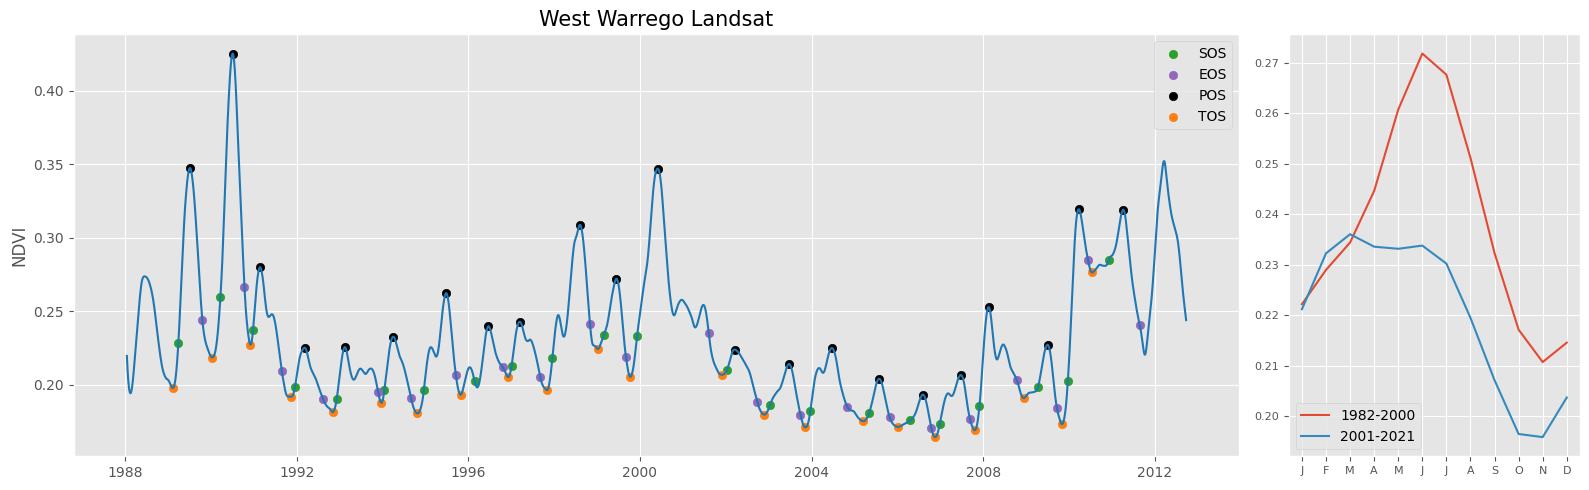

In [14]:
with plt.style.context('ggplot'):
    fig,ax = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'width_ratios': [4, 1]})
    
    results[k].plot(ax=ax[0], c='tab:blue')
    ax[0].scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(eco_regions_phenometrics[k].SOS.values,
               eco_regions_phenometrics[k].SOS_year.values)],
               y=eco_regions_phenometrics[k].vSOS,
              c='tab:green', label='SOS')
    
    ax[0].scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(eco_regions_phenometrics[k].EOS.values,
                eco_regions_phenometrics[k].EOS_year.values)],
               y=eco_regions_phenometrics[k].vEOS,
              c='tab:purple', label='EOS')
    
    ax[0].scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(eco_regions_phenometrics[k].POS.values, eco_regions_phenometrics[k].POS_year.values)],
                   y=eco_regions_phenometrics[k].vPOS,
                  c='black', label='POS')
        
    ax[0].scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(eco_regions_phenometrics[k].TOS.values, eco_regions_phenometrics[k].TOS_year.values)],
               y=eco_regions_phenometrics[k].vTOS,
              c='tab:orange', label='TOS')
    # ax[0].set_ylim(0.13,0.36)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel('NDVI')
    ax[0].set_title(k+' '+product, fontsize=15)
    ax[0].legend()
    
    early_clim = results[k].sel(time=slice('1982', '2000')).groupby('time.month').mean()
    late_clim = results[k].sel(time=slice('2001', '2021')).groupby('time.month').mean()
    early_clim.plot(label='1982-2000', ax=ax[1])
    late_clim.plot(label='2001-2021', ax=ax[1])
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].legend()
    ax[1].set_title(None)
    ax[1].set(xticks=range(1,13))
    ax[1].tick_params(axis='y', labelsize=8)
    ax[1].set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"], fontsize=8)
    plt.tight_layout();

In [ ]:
# pheno_trends.plot(column='IOS_p-value', legend=True, vmin=0, vmax=0.05)

In [ ]:
eco_regions_phenometrics[k].vPOS.plot(figsize=(10,3))
plt.title('vPOS '+product)

## Plot subset of regions

e.g. all the 'irrigated' regions

In [ ]:
irrigated = {k:v for k, v in results.items() if 'irrigated crop' in k}
irrigated_pheno = {k:v for k, v in eco_regions_phenometrics.items() if 'irrigated crop' in k}

rainfed = {k:v for k, v in results.items() if 'rainfed crop' in k}
rainfed_pheno = {k:v for k, v in eco_regions_phenometrics.items() if 'rainfed crop' in k}

In [ ]:
# len(rainfed)

In [ ]:
# keys_list = list(rainfed_pheno.keys())
# keys_list.sort()
# length = len(keys_list)
    
# with plt.style.context('ggplot'):
#     fig,axes = plt.subplots(length,1, figsize=(11,120), sharex=True, layout='constrained')
#     # plt.subplots(1,2, figsize=(16,5), gridspec_kw={'width_ratios': [4, 1]})
#     for k,ax in zip(keys_list, axes.ravel()):
    
#         rainfed[k].plot(ax=ax, c='tab:blue')
#         ax.scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(rainfed_pheno[k].SOS.values, rainfed_pheno[k].SOS_year.values)],
#                    y=rainfed_pheno[k].vSOS,
#                   c='tab:green', label='SOS')
        
#         ax.scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(rainfed_pheno[k].EOS.values, rainfed_pheno[k].EOS_year.values)],
#                    y=rainfed_pheno[k].vEOS,
#                   c='tab:purple', label='EOS')
        
#         ax.scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(rainfed_pheno[k].POS.values, rainfed_pheno[k].POS_year.values)],
#                        y=rainfed_pheno[k].vPOS,
#                       c='black', label='POS')
            
#         ax.scatter(x=[pd.to_datetime(d-1, unit='D', origin=str(int(y))) for d,y in zip(rainfed_pheno[k].TOS.values, rainfed_pheno[k].TOS_year.values)],
#                    y=rainfed_pheno[k].vTOS,
#                   c='tab:orange', label='TOS')
        
#         ax.set_xlabel(None)
#         ax.set_ylabel(None)
#         ax.set_title(k, fontsize=8)
#         # ax.legend()

In [ ]:
# fig,axes=plt.subplots(1,1, figsize=(11,11),  layout='constrained')
# significant.plot(column='IOS_slope',ax=ax, legend=False, cmap='coolwarm', vmin=-1.5, vmax=1.5, hatch='XXX')   
# not_significant.plot(column='SOS_slope',ax=ax, legend=False, cmap='coolwarm', vmin=-1.5, vmax=1.5);

## Facet plots of phenograms

Maybe instead group the plots by similar land covers e.g. Rainfed cropping regions, forested regions, grasslands

### Gridded phenology

In [ ]:
#create a grid
xi = np.linspace(1, 12, 12) #months
yi = np.linspace(1982, 2022, 41) #years
Xi, Yi = np.meshgrid(xi, yi) #grid coords

with plt.style.context('default'):
    fig, axes = plt.subplots(20,7, figsize=(13,30), sharex=True)
    for ax, (k,v) in zip(axes.reshape(-1), results.items()):
        dss = v.resample(time='MS', loffset=pd.Timedelta(14, 'd')).mean()
        zi = griddata(points=(dss.time.dt.month, dss.time.dt.year),
                      values=dss.values,
                      xi=(xi[None, :], yi[:, None]),
                      method='nearest')
        
        sp = ax.contourf(zi, levels=75, cmap='gist_earth_r')
        # clb = fig.colorbar(sp, ax=axes, shrink=0.65, format="%0.2f")
        # clb.ax.set_title('NDVI', fontsize=5)
        ax.set(xticks=range(0,12))
        ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"], fontsize=8);
        ax.set(yticks=range(0,41))
        ax.set_yticklabels([str(y) for y in range(1982,2023)], fontsize=8);
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
        ax.set_title(k, fontsize=6);
    plt.tight_layout();

fig.savefig('/g/data/os22/chad_tmp/Aus_phenology/results/figs/phenology_grids_'+region_type+'.png',
          bbox_inches='tight', dpi=300);

### Before/after seasonal curves

The better way to do this would be to recreate the seasonal cycles using the phenology stats, then we could have time-series that extend beyong just the year

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(20,7, figsize=(15,30), sharex=True)
for ax, (k,v) in zip(axes.reshape(-1), results.items()):
    early_clim = v.sel(time=slice('1982', '2000')).groupby('time.month').mean()
    late_clim = v.sel(time=slice('2001', '2021')).groupby('time.month').mean()
    early_clim.plot(label='1982-2001', ax=ax)
    late_clim.plot(label='2002-2021', ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    #ax.legend()
    ax.set_title(k, fontsize=6)
    ax.set(xticks=range(1,13))
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"], fontsize=8);
fig.supylabel('NDVI')
plt.tight_layout()